# 연도별 방문 추이 및 계절성 분석

**작성자**: 경영분석팀  
**작성일**: 2026-02-07  
**데이터**: OMOP CDM visit_occurrence (4,500,000건)  

## 분석 목표
- 연도별/월별 방문 건수 추이 파악
- 방문 유형(외래/입원/응급)별 추세 비교
- 계절성 패턴 분석
- 평균 재원일수 추이

In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

# DB 연결 (환경변수 우선, fallback: JupyterLab 컨테이너용 호스트)
DB_HOST = os.environ.get('OMOP_DB_HOST', 'host.docker.internal')
DB_PORT = os.environ.get('OMOP_DB_PORT', '5436')
DB_USER = os.environ.get('OMOP_DB_USER', 'omopuser')
DB_PASS = os.environ.get('OMOP_DB_PASS', 'omop')
DB_NAME = os.environ.get('OMOP_DB_NAME', 'omop_cdm')

engine = create_engine(f'postgresql://{DB_USER}:{DB_PASS}@{DB_HOST}:{DB_PORT}/{DB_NAME}')

# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

print(f'데이터베이스 연결: {DB_HOST}:{DB_PORT}/{DB_NAME}')

데이터베이스 연결: host.docker.internal:5436/omop_cdm


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
/tmp/ipykernel_169/1216395056.py:29: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_169/1216395056.py:29: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  plt.tight_layout()
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family '

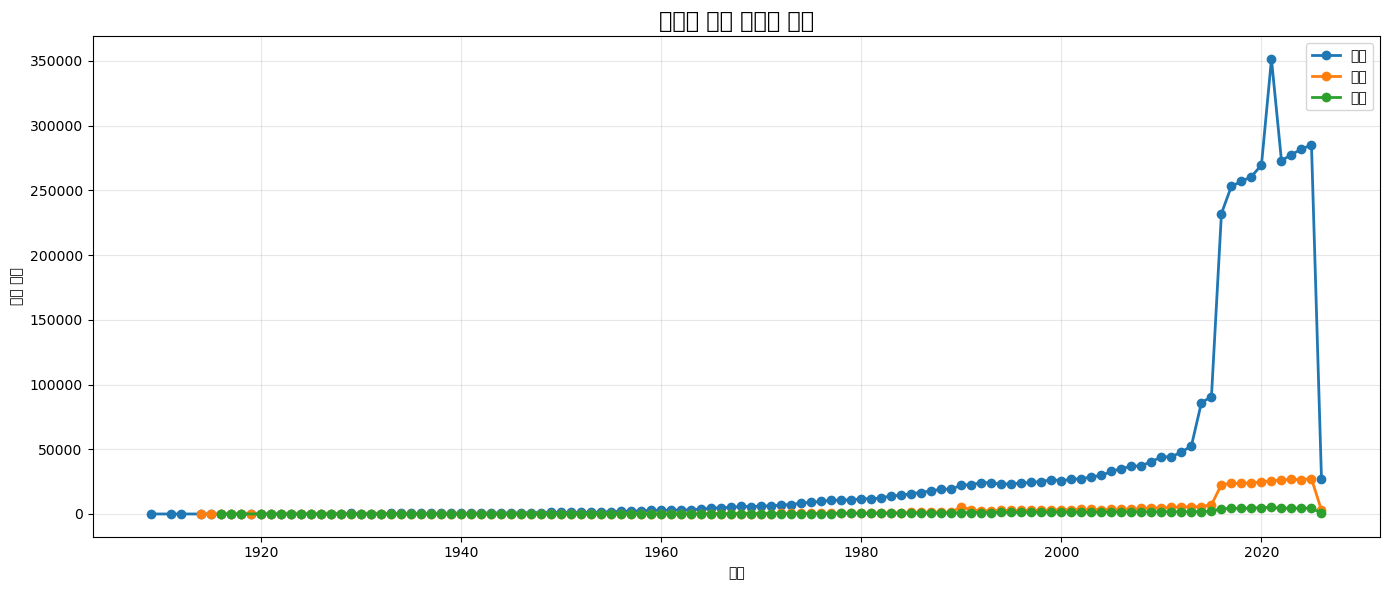

In [11]:
# 연도별 방문 유형별 건수
yearly_query = """
SELECT 
    EXTRACT(YEAR FROM visit_start_date)::int AS 연도,
    CASE visit_concept_id
        WHEN 9201 THEN '입원'
        WHEN 9202 THEN '외래'
        WHEN 9203 THEN '응급'
        ELSE '기타'
    END AS 방문유형,
    COUNT(*) AS 방문건수
FROM visit_occurrence
GROUP BY 연도, 방문유형
ORDER BY 연도, 방문유형
"""

df_yearly = pd.read_sql(yearly_query, engine)

plt.figure(figsize=(14, 6))
for vtype in df_yearly['방문유형'].unique():
    subset = df_yearly[df_yearly['방문유형'] == vtype]
    plt.plot(subset['연도'], subset['방문건수'], marker='o', label=vtype, linewidth=2)

plt.title('연도별 방문 유형별 추이', fontsize=16)
plt.xlabel('연도')
plt.ylabel('방문 건수')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
/tmp/ipykernel_169/1264676316.py:20: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  plt.tight_layout()
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font fa

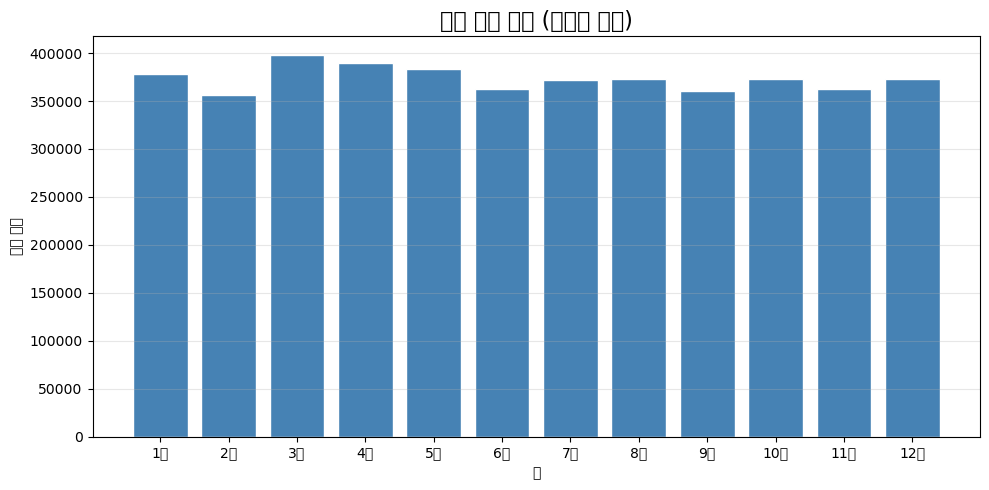

In [12]:
# 월별 방문 패턴 (계절성 분석)
monthly_query = """
SELECT 
    EXTRACT(MONTH FROM visit_start_date)::int AS 월,
    COUNT(*) AS 방문건수
FROM visit_occurrence
GROUP BY 월
ORDER BY 월
"""

df_monthly = pd.read_sql(monthly_query, engine)

plt.figure(figsize=(10, 5))
bars = plt.bar(df_monthly['월'], df_monthly['방문건수'], color='steelblue', edgecolor='white')
plt.title('월별 방문 건수 (계절성 패턴)', fontsize=16)
plt.xlabel('월')
plt.ylabel('방문 건수')
plt.xticks(range(1, 13), [f'{m}월' for m in range(1, 13)])
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
/tmp/ipykernel_169/2988992824.py:29: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_169/2988992824.py:29: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  plt.tight_layout()
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
/tmp/ipykernel_169/2988992824.py:29: UserWarning: Glyph 51077 (\N{HANG

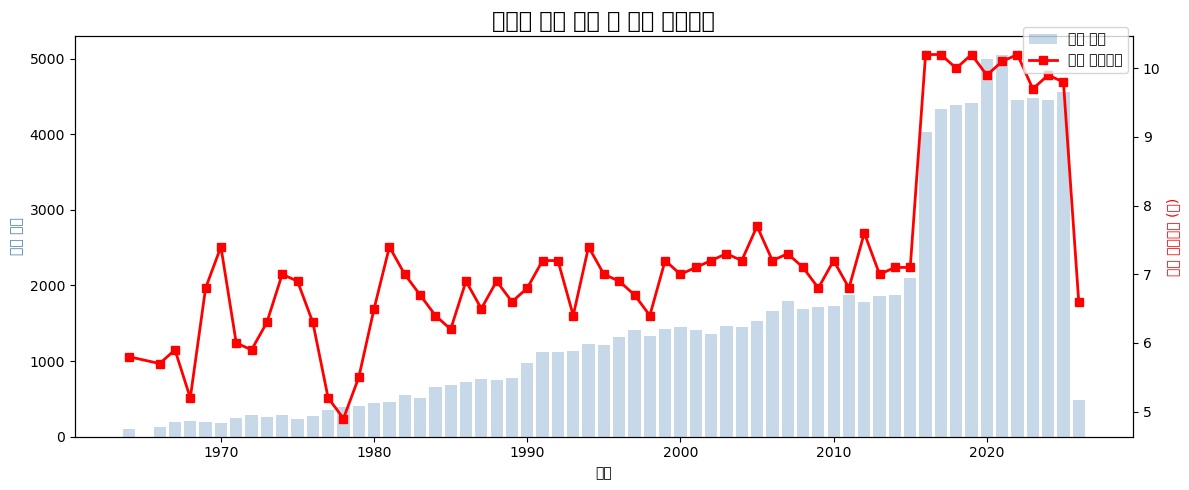

In [13]:
# 입원 환자 평균 재원일수 추이
los_query = """
SELECT 
    EXTRACT(YEAR FROM visit_start_date)::int AS 연도,
    ROUND(AVG(visit_end_date - visit_start_date), 1) AS 평균재원일수,
    COUNT(*) AS 입원건수
FROM visit_occurrence
WHERE visit_concept_id = 9201
  AND visit_end_date IS NOT NULL
GROUP BY 연도
HAVING COUNT(*) >= 100
ORDER BY 연도
"""

df_los = pd.read_sql(los_query, engine)

fig, ax1 = plt.subplots(figsize=(12, 5))
ax2 = ax1.twinx()

ax1.bar(df_los['연도'], df_los['입원건수'], alpha=0.3, color='steelblue', label='입원 건수')
ax2.plot(df_los['연도'], df_los['평균재원일수'], color='red', marker='s', linewidth=2, label='평균 재원일수')

ax1.set_xlabel('연도')
ax1.set_ylabel('입원 건수', color='steelblue')
ax2.set_ylabel('평균 재원일수 (일)', color='red')

plt.title('연도별 입원 건수 및 평균 재원일수', fontsize=16)
fig.legend(loc='upper right', bbox_to_anchor=(0.95, 0.95))
plt.tight_layout()
plt.show()

## 분석 결과 요약

### 주요 발견사항
1. **외래 방문**이 전체 방문의 대부분을 차지
2. 연도별로 전반적인 방문 증가 추세 확인
3. 월별 분석 결과 **환절기(3-4월, 9-10월)** 방문 집중
4. 평균 재원일수는 점진적 감소 추세 (진료 효율화 반영)

### 활용 방안
- 계절별 인력 배치 최적화
- 외래 예약 시스템 개선
- 입원 관리 효율화 전략 수립